## Empirical Distributions vs Model Distributions

In class we talked about two types of distributions:
* **model distributions** describe a theoretical distribution. random samples can be **generated** from such a distribution.
* **empirical distribution** are associated with samples. Samples can be generated from **model distributions**, samples can also be collected from the real world.
* **Statistics** is the field concerned with making inferences from data collected in the real world.
* **Probability** is a mathematical theory which is mostly concerned with model distributions.

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [97]:
def plot_normal(mu,sigma,n):
    figure(figsize=[15,5]);
    for i in range(3):
        subplot(1,3,i+1);
        s = np.random.normal(mu, sigma, n)
        count, bins, ignored = plt.hist(s, 30, density=True);
        plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r');
        title("n=%d, run %d"%(n,i+1));

### Histograms
Histograms provide an intuitive way to visualize a distribution.

Below we have histograms of data of $n$ points generated according the a **model** normal distribution with mean $\mu=0.5$ and standard deviation $\sigma=0.1$. The histogram represents the **empirical distribution**.


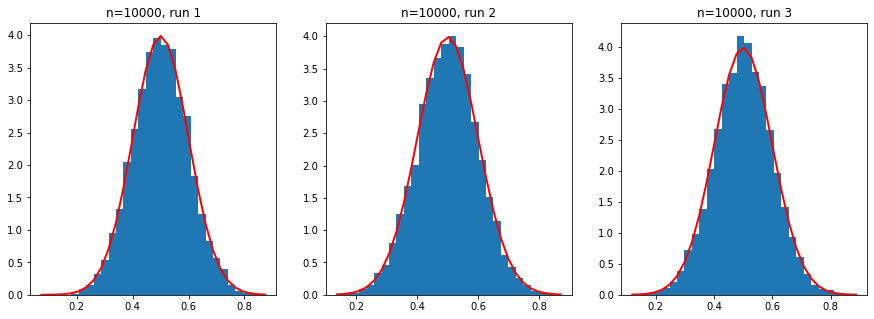

In [108]:
mu, sigma = 0.5, 0.1 # mean and standard deviation
plot_normal(mu,sigma,10000)

### Histograms need a lot of data
With $n=10,000$ the fit of the model and the empirical is very good. However that degrades as $n$ gets smaller.

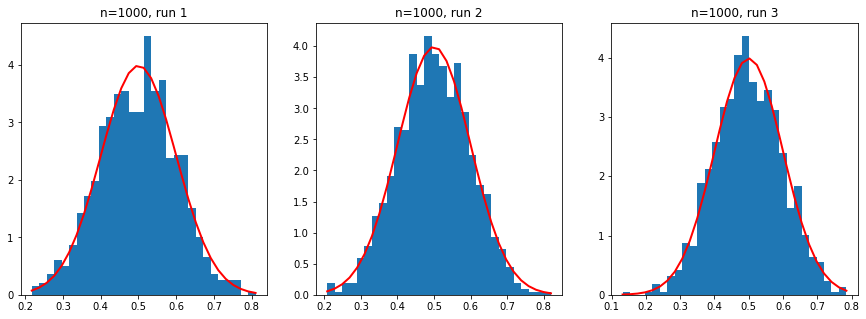

In [109]:
plot_normal(mu,sigma,1000)

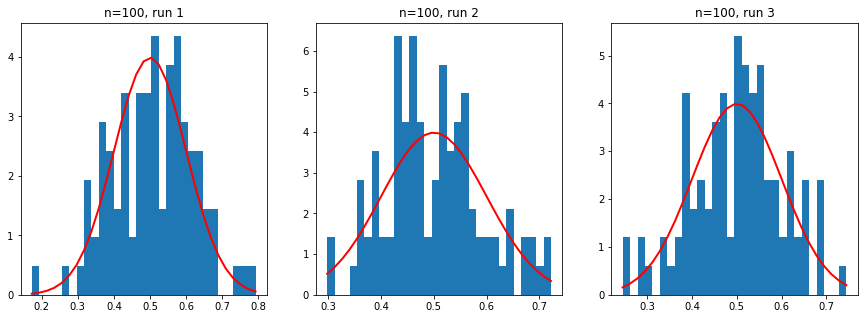

In [110]:
plot_normal(mu,sigma,100)

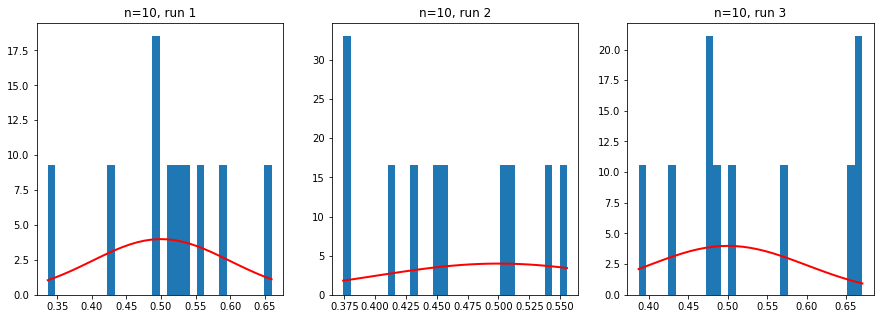

In [111]:
plot_normal(mu,sigma,10)

In [107]:
for n in [10,100,1000,10000]:
    print('n=%d,generator mu=%6.3f,generator sigma=%6.3f'%(n,mu,sigma))
    for i in range(5):
        s = np.random.normal(mu, sigma, n)
        print('     empirical mu=%6.3f,empirical sigma=%6.3f'%(mean(s),std(s)))

n=10,generator mu= 0.500,generator sigma= 0.100
     empirical mu= 0.478,empirical sigma= 0.093
     empirical mu= 0.489,empirical sigma= 0.141
     empirical mu= 0.459,empirical sigma= 0.109
     empirical mu= 0.520,empirical sigma= 0.062
     empirical mu= 0.493,empirical sigma= 0.098
n=100,generator mu= 0.500,generator sigma= 0.100
     empirical mu= 0.493,empirical sigma= 0.099
     empirical mu= 0.485,empirical sigma= 0.098
     empirical mu= 0.497,empirical sigma= 0.109
     empirical mu= 0.525,empirical sigma= 0.103
     empirical mu= 0.504,empirical sigma= 0.100
n=1000,generator mu= 0.500,generator sigma= 0.100
     empirical mu= 0.502,empirical sigma= 0.106
     empirical mu= 0.499,empirical sigma= 0.099
     empirical mu= 0.503,empirical sigma= 0.098
     empirical mu= 0.502,empirical sigma= 0.101
     empirical mu= 0.497,empirical sigma= 0.095
n=10000,generator mu= 0.500,generator sigma= 0.100
     empirical mu= 0.501,empirical sigma= 0.100
     empirical mu= 0.499,empirical

## Which fertilizer is better?

Suppose we want to know which of two fertilizers gives larger strawberries.

We apply the each fertilizer to a separate field, and collect $n$ straberries at random from each field

We take a sample of $n$ strawberries from each field ato answer the question

In [241]:
s1 = np.random.normal(0, 0.5, 100)
s2 = np.random.normal(1, 0.5, 100)

In [257]:
s1 = np.random.normal(100, 200, 10)
s2 = np.random.normal(200, 200, 10)
s1,s2

(array([  70.42494063,  130.52037623,  246.13477507, -194.87579439,
        -215.12721469,  369.63875281,   65.04712773, -163.78521767,
         441.6528012 ,  -15.34650658]),
 array([ -4.38000851, 497.67868483, 302.39394005, 317.93845772,
        491.37243064, 184.0693996 , 128.36810954, 283.23133306,
        428.58225213, 390.71097476]))

In [258]:
s1 = np.random.normal(1, 0.1, 10)
s2 = np.random.normal(2, 0.2, 10)
s1,s2

(array([1.14879929, 0.76512504, 0.80273265, 1.04635092, 1.26255218,
        0.90611433, 0.91005828, 0.94326605, 1.03684602, 0.97774236]),
 array([1.88664266, 2.0693071 , 1.97375892, 1.67162109, 1.79280727,
        2.16055648, 2.26588398, 2.15354377, 1.84743905, 2.28872479]))

s1: mean= 0.980, std= 0.143 s2: mean= 2.011, std= 0.199


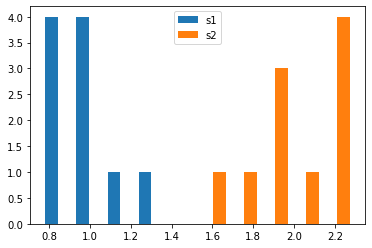

In [259]:
print('s1: mean=%6.3f, std=%6.3f s2: mean=%6.3f, std=%6.3f'\
     %(mean(s1),std(s1),mean(s2),std(s2)))

hist([s1,s2]);
legend(['s1','s2']);

## The problem with outliers
The variance is a useful measure of spread when the true distribution is close to normal. **outliers** are values that are far from the mean and occur with small probability.
**outliers** can make the std very large.

Moreover, because outliers have small probability, they might not appear in our sample, and we remain ignorant of their existence and effect.


s1: mean= 1.000, std= 0.000 s2: mean=-1.000, std= 0.000


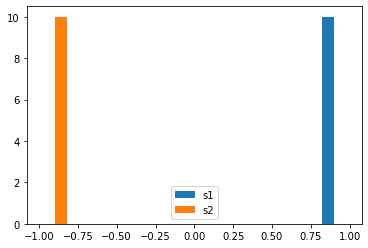

In [227]:
pp=0.01
v=10000
n=10
s1=np.random.choice([-v,1], n, p=[pp,1-pp])
s2=np.random.choice([v,-1], n, p=[pp,1-pp])
print('s1: mean=%6.3f, std=%6.3f s2: mean=%6.3f, std=%6.3f'\
     %(mean(s1),std(s1),mean(s2),std(s2)))

hist([s1,s2]);
legend(['s1','s2']);

## HW problems
In each problem, you are given two samples, **s1** and **s2**. calculate the mean and std of each sample, decide which sample has a higher true mean and say whether your confidence in that decision is high or low.

In [239]:
#problem 1
s1 = array([  70.42494063,  130.52037623,  246.13477507, -194.87579439,
        -215.12721469,  369.63875281,   65.04712773, -163.78521767,
         441.6528012 ,  -15.34650658])
s2 = array([ -4.38000851, 497.67868483, 302.39394005, 317.93845772,
        491.37243064, 184.0693996 , 128.36810954, 283.23133306,
        428.58225213, 390.71097476])


In [260]:
#problem 2
s1 = array([1.14879929, 0.76512504, 0.80273265, 1.04635092, 1.26255218,
        0.90611433, 0.91005828, 0.94326605, 1.03684602, 0.97774236])
s2 = array([1.88664266, 2.0693071 , 1.97375892, 1.67162109, 1.79280727,
        2.16055648, 2.26588398, 2.15354377, 1.84743905, 2.28872479])
